<a href="https://colab.research.google.com/github/kkmcgg/experiments/blob/main/kkmc_fetch_maybe_modified_rorated_NS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

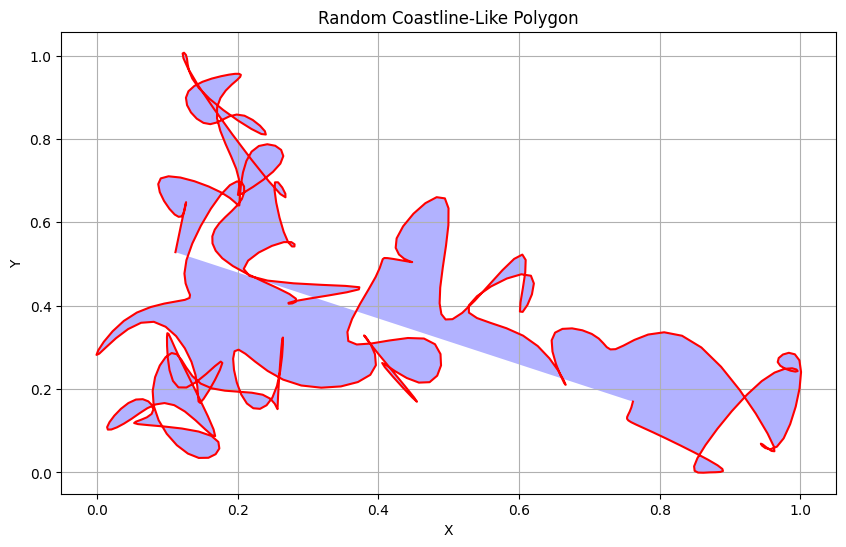

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Number of points
num_points = 100

# Generate random walk for coastline
np.random.seed(42)  # for reproducibility
x = np.cumsum(np.random.randn(num_points))  # random walk for x
y = np.cumsum(np.random.randn(num_points))  # random walk for y

# Normalize and scale to [0, 1] interval
x = (x - min(x)) / (max(x) - min(x))
y = (y - min(y)) / (max(y) - min(y))

# Interpolate points to smooth the path
t = np.linspace(0, 1, num_points)
t_interpolated = np.linspace(0, 1, 5 * num_points)  # increase points for smoothness
spl_x = interp1d(t, x, kind='cubic')
spl_y = interp1d(t, y, kind='cubic')

x_smooth = spl_x(t_interpolated)
y_smooth = spl_y(t_interpolated)

# Create the coastline shape
plt.figure(figsize=(10, 6))
plt.fill(x_smooth, y_smooth, 'b', alpha=0.3)  # Fill the area under the curve
plt.plot(x_smooth, y_smooth, 'r-', linewidth=1.5)  # Draw the coastline
plt.title("Random Coastline-Like Polygon")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


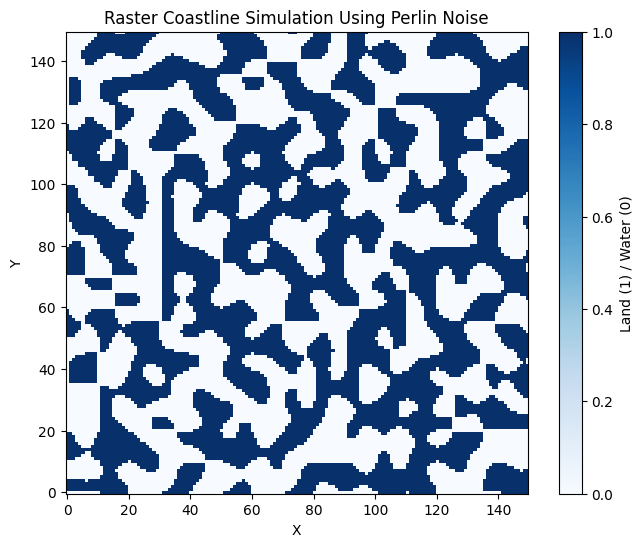

In [3]:
# Install the noise library
!pip install noise

import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2

# Define the size of the grid
grid_size = (150, 150)
scale = 0.1  # Scale of the noise
threshold = 0.0  # Threshold for defining coastline

# Generate Perlin noise based grid
grid = np.zeros(grid_size)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        grid[i][j] = pnoise2(i * scale, j * scale)

# Apply threshold to create coastline
coastline = np.where(grid > threshold, 1, 0)

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(coastline, cmap='Blues', origin='lower')
plt.colorbar(label='Land (1) / Water (0)')
plt.title('Raster Coastline Simulation Using Perlin Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(False)  # Turn off the grid for better visual effect
plt.show()


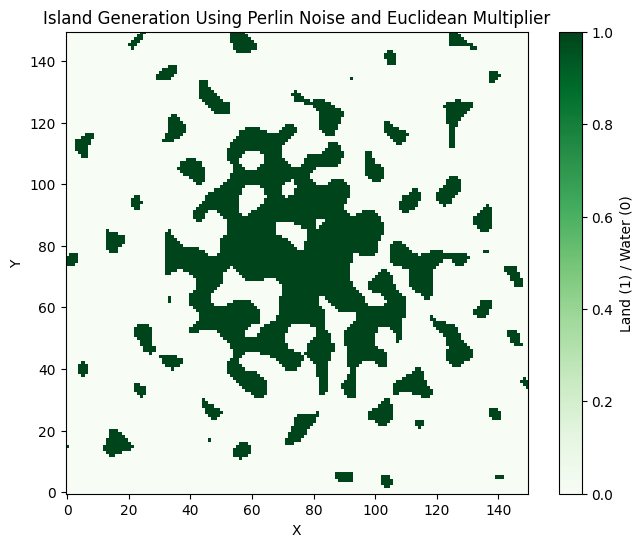

In [4]:
# Install the noise library if not already installed
!pip install noise

import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2

# Define the size of the grid
grid_size = (150, 150)
scale = 0.1  # Scale of the noise
threshold = 0.0  # Threshold for defining coastline
center = (grid_size[0] // 2, grid_size[1] // 2)  # Center of the grid

# Initialize the grids
euclid_grid = np.zeros(grid_size)
noise_grid = np.zeros(grid_size)

# Maximum distance from the center
max_distance = np.sqrt((center[0])**2 + (center[1])**2)

# Generate Euclidean distance grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        dist = np.sqrt((center[0] - i)**2 + (center[1] - j)**2)
        euclid_grid[i][j] = 1 - (dist / max_distance)  # Normalize and invert the distance

# Generate Perlin noise grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        noise_grid[i][j] = pnoise2(i * scale, j * scale)

# Multiply the two grids to apply the distance effect to the noise
combined_grid = noise_grid + euclid_grid*euclid_grid

# Apply threshold to create the island
island = np.where(combined_grid > .5, 1, 0)

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(island, cmap='Greens', origin='lower')
plt.colorbar(label='Land (1) / Water (0)')
plt.title('Island Generation Using Perlin Noise and Euclidean Multiplier')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(False)  # Turn off the grid for better visual effect
plt.show()


In [5]:
islandSum= np.sum(island,axis=1)
islandSum

array([ 0,  0,  2,  4,  9, 12,  6,  0,  0,  0,  0,  1,  7, 11, 15, 16, 14,
       13, 10, 10,  8,  7, 12, 15, 20, 23, 19, 15,  9,  5,  3, 10, 23, 31,
       33, 32, 30, 24, 24, 23, 22, 33, 38, 47, 50, 49, 54, 49, 52, 50, 51,
       50, 54, 58, 61, 59, 53, 56, 56, 63, 63, 53, 49, 43, 44, 47, 47, 51,
       52, 58, 62, 65, 69, 74, 81, 87, 91, 90, 80, 70, 64, 61, 56, 52, 47,
       46, 47, 49, 55, 61, 56, 53, 52, 51, 53, 52, 51, 46, 42, 38, 40, 43,
       39, 39, 40, 38, 37, 33, 29, 27, 25, 27, 27, 30, 33, 34, 39, 34, 29,
       21, 18, 16, 16, 20, 22, 24, 26, 18, 10,  9,  6,  4,  3,  5,  9, 10,
        9,  5,  3,  3,  3,  4,  4,  7, 11, 19, 17, 15, 12, 10])

Encoded Data:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

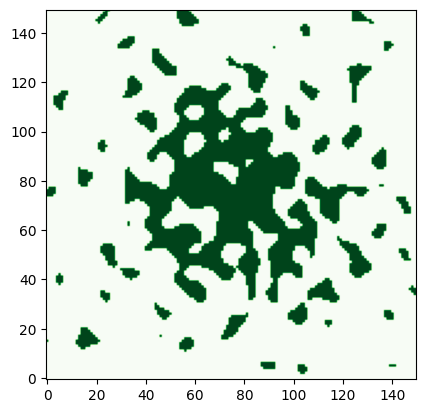

In [6]:
def delta_encode_2d(data):
    encoded = []
    for row in data:
        if not encoded:  # If encoded list is empty, add the first row as is
            encoded.append(row.tolist())
            continue
        previous_row = encoded[-1]
        delta_row = [row[0]]  # Include the first element of the new row as reference
        for i in range(1, len(row)):
            delta_row.append(row[i] - row[i-1])  # Calculate delta with previous element in the same row
        encoded.append(delta_row)
    return encoded

def delta_decode_2d(encoded):
    decoded = []
    for i, row in enumerate(encoded):
        if i == 0:  # First row is added as is since it was not encoded
            decoded.append(row)
            continue
        new_row = [row[0]]  # Start with the first element as a reference
        for j in range(1, len(row)):
            new_row.append(new_row[j-1] + row[j])  # Reconstruct by adding the delta to the last element
        decoded.append(new_row)
    return decoded

# Example usage with a simple binary grid
island_grid = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1]
])

island_grid = island

# Encode and decode
encoded_island = delta_encode_2d(island_grid)
decoded_island = delta_decode_2d(encoded_island)

print("Encoded Data:")
print(encoded_island)
print(np.array(encoded_island).shape)
print("Decoded Data:")
print(np.array(decoded_island))
print(np.array(decoded_island).shape)

plt.imshow(decoded_island, cmap='Greens', origin='lower')

Compressed Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Decompressed Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


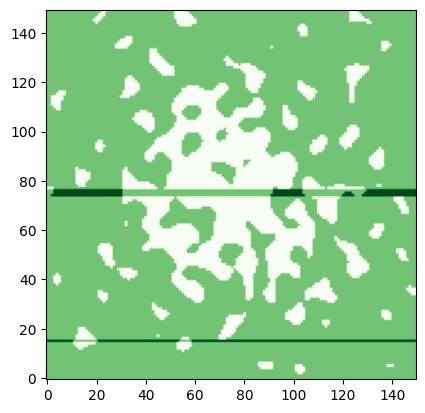

In [7]:
import numpy as np

def delta_compress(array):
    # Roll the array left by one and calculate the difference
    rolled = np.roll(array, -1, axis=1)
    differences = array - rolled
    differences[:, -1] = 0  # Reset the last column which has invalid data due to the roll

    # Identify significant changes (where difference is not zero)
    changes = np.where(differences != 0, differences, 0)
    return changes

def delta_decompress(changes):
    # To decompress, reconstruct the array row by row
    reconstructed = np.zeros_like(changes)
    reconstructed[:, 0] = changes[:, 0]  # Start with the first column as the base
    for i in range(1, changes.shape[1]):
        reconstructed[:, i] = reconstructed[:, i-1] + changes[:, i]
    return reconstructed

# Example usage with a simple binary grid
island_grid = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1]
])

island_grid = island

# Compress and decompress
compressed_data = delta_compress(island_grid)
decompressed_data = delta_decompress(compressed_data)

print("Compressed Data:")
print(compressed_data)
print("Decompressed Data:")
print(decompressed_data)

plt.imshow(decompressed_data, cmap='Greens', origin='lower')

Indices of Changes:
[[  2 102]
 [  2 104]
 [  3 101]
 ...
 [149  57]
 [149 123]
 [149 126]]
Marked Changes in Decompressed Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


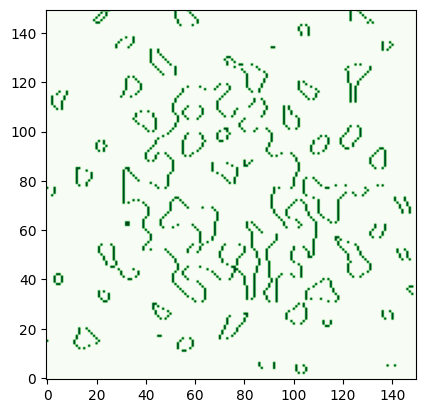

In [8]:
import numpy as np

def delta_compress_indices(array):
    # Roll the array left by one and calculate the difference
    rolled = np.roll(array, -1, axis=1)
    differences = array - rolled
    differences[:, -1] = 0  # Reset the last column which has invalid data due to the roll

    # Get indices where there are changes
    change_indices = np.argwhere(differences != 0)
    return change_indices

def delta_decompress_indices(change_indices, shape):
    # Initialize the decompressed array
    decompressed_array = np.zeros(shape, dtype=int)
    for idx in change_indices:
        row, col = idx
        decompressed_array[row, col] = 1  # Set the change points back to 1

    # Decompression to reconstruct full data would need more information
    # about the nature of changes, e.g., storing changes as well.
    return decompressed_array

# Example usage with a simple binary grid
island_grid = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1]
])


island_grid = island

# Compress to get indices of changes
compressed_indices = delta_compress_indices(island_grid)

# Dummy decompression to see where changes were marked
decompressed_data = delta_decompress_indices(compressed_indices, island_grid.shape)

print("Indices of Changes:")
print(compressed_indices)
print("Marked Changes in Decompressed Data:")
print(decompressed_data)
plt.imshow(decompressed_data, cmap='Greens', origin='lower')

Indices of Changes:
[[  2 102]
 [  2 104]
 [  3 101]
 ...
 [149  57]
 [149 123]
 [149 126]]
Values at Changes:
[0 1 0 ... 1 0 1]
Decompressed Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


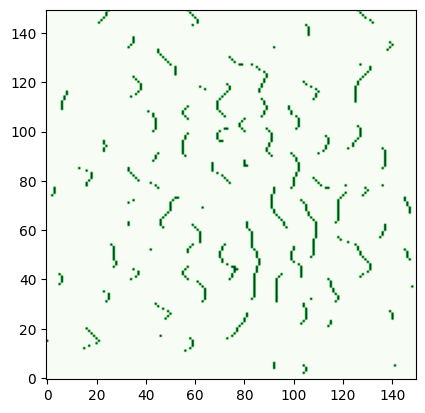

In [9]:
import numpy as np

def delta_compress_indices(array):
    # Roll the array left by one and calculate the difference
    rolled = np.roll(array, -1, axis=1)
    differences = array - rolled
    differences[:, -1] = 0  # Reset the last column which has invalid data due to the roll

    # Get indices and values where there are changes
    change_indices = np.argwhere(differences != 0)
    change_values = array[change_indices[:, 0], change_indices[:, 1]]
    return change_indices, change_values

def delta_decompress_indices(change_indices, change_values, shape):
    # Initialize the decompressed array with the first value assumed (often zero or similar)
    decompressed_array = np.zeros(shape, dtype=int)

    # Set initial values for the array from the first column or default
    for index, value in zip(change_indices, change_values):
        row, col = index
        if col == 0:
            decompressed_array[row, col] = value
        else:
            decompressed_array[row, col] = decompressed_array[row, col-1] + value

    return decompressed_array

# Example usage with a simple binary grid
island_grid = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1]
])

island_grid = island

# Compress to get indices and values of changes
compressed_indices, compressed_values = delta_compress_indices(island_grid)

# Decompress to reconstruct the original grid
decompressed_data = delta_decompress_indices(compressed_indices, compressed_values, island_grid.shape)

print("Indices of Changes:")
print(compressed_indices)
print("Values at Changes:")
print(compressed_values)
print("Decompressed Data:")
print(decompressed_data)
plt.imshow(decompressed_data, cmap='Greens', origin='lower')

Indices of Changes:
[[  2 103]
 [  2 105]
 [  3 102]
 ...
 [149  58]
 [149 124]
 [149 127]]
Values at Changes:
[1 0 1 ... 0 1 0]
Decompressed Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


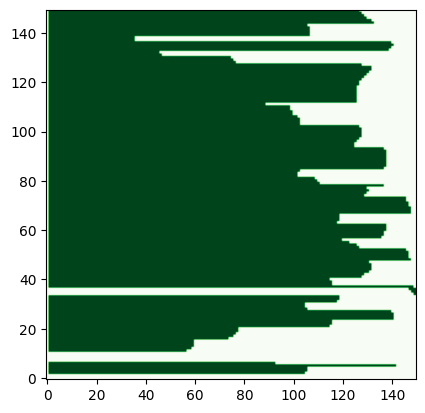

In [10]:
import numpy as np

def delta_compress_indices(array):
    # Roll the array left by one and calculate the difference
    rolled = np.roll(array, 1, axis=1)
    differences = array - rolled
    differences[:, 0] = array[:, 0]  # Set initial values since roll distorts the first column

    # Get indices and values where there are changes
    change_indices = np.argwhere(differences != 0)
    change_values = array[change_indices[:, 0], change_indices[:, 1]]
    return change_indices, change_values

def delta_decompress_indices(change_indices, change_values, shape):
    decompressed_array = np.zeros(shape, dtype=int)
    last_val = 0

    # Process each row individually
    for r in range(shape[0]):
        row_indices = change_indices[change_indices[:, 0] == r]
        row_values = change_values[change_indices[:, 0] == r]

        last_val = 0  # Reset last value for each row
        if len(row_indices) > 0:
            for idx, value in zip(row_indices[:, 1], row_values):
                decompressed_array[r, last_val:idx] = last_val
                decompressed_array[r, idx] = value
                last_val = value
            # Fill remaining values in the row after the last change
            decompressed_array[r, idx:] = last_val
        else:
            # If no changes, fill the row with the last known value
            decompressed_array[r, :] = last_val

    return decompressed_array

# Example usage with a simple binary grid
island_grid = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1]
])

island_grid = island


# Compress to get indices and values of changes
compressed_indices, compressed_values = delta_compress_indices(island_grid)

# Decompress to reconstruct the original grid
decompressed_data = delta_decompress_indices(compressed_indices, compressed_values, island_grid.shape)

print("Indices of Changes:")
print(compressed_indices)
print("Values at Changes:")
print(compressed_values)
print("Decompressed Data:")
print(decompressed_data)
plt.imshow(decompressed_data, cmap='Greens', origin='lower')


SUCSESSFUL DELTA COMPRESSION AND DECOMPRESSION BELOW!

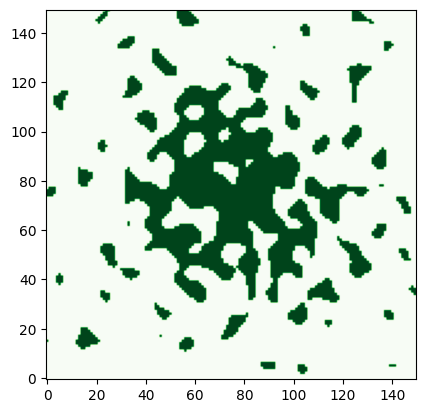

22500
Indices of Changes:
[[  0   0]
 [  1   0]
 [  2   0]
 ...
 [149  58]
 [149 124]
 [149 127]]
2630
Values at Changes:
[0 0 0 ... 0 1 0]
1315
compressed size: 3945
original size: 22500
Decompressed Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
22500


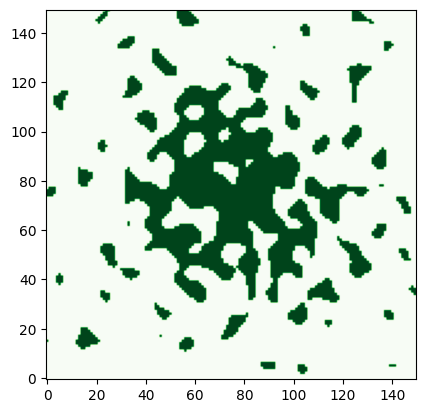

In [11]:
import numpy as np

def delta_compress_indices(array):
    # Calculate differences from the initial element in each row
    compressed_indices = []
    compressed_values = []
    for i, row in enumerate(array):
        initial_value = row[0]
        compressed_indices.append((i, 0))
        compressed_values.append(initial_value)
        for j in range(1, len(row)):
            if row[j] != row[j-1]:
                compressed_indices.append((i, j))
                compressed_values.append(row[j])
    return np.array(compressed_indices), np.array(compressed_values)

def delta_decompress_indices(compressed_indices, compressed_values, shape):
    decompressed_array = np.zeros(shape, dtype=int)
    for (row_idx, col_idx), value in zip(compressed_indices, compressed_values):
        decompressed_array[row_idx, col_idx:] = value  # Set from the change point to the end of the row
    return decompressed_array
# Example usage with a simple binary grid
island_grid = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1]
])

island_grid = island


# Compress to get indices and values of changes
compressed_indices, compressed_values = delta_compress_indices(island_grid)

# Decompress to reconstruct the original grid
decompressed_data = delta_decompress_indices(compressed_indices, compressed_values, island_grid.shape)

plt.imshow(island_grid, cmap='Greens', origin='lower')
plt.show()
print(np.array(island_grid).size)
print("Indices of Changes:")
print(compressed_indices)
print(np.array(compressed_indices).size)
print("Values at Changes:")
print(compressed_values)
print(np.array(compressed_values).size)

print('compressed size:',np.array(compressed_indices).size+np.array(compressed_values).size)
print('original size:',np.array(island_grid).size)
print("Decompressed Data:")
print(decompressed_data)
print(np.array(decompressed_data).size)
plt.imshow(decompressed_data, cmap='Greens', origin='lower')


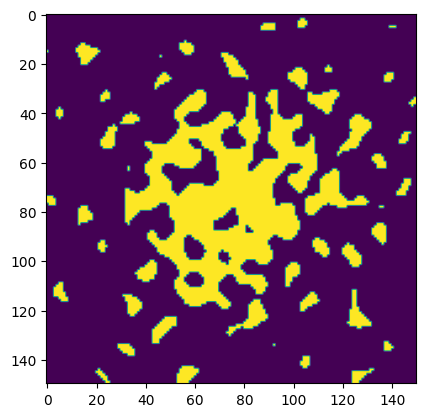

[[  6   3   3 ...   3   3   2]
 [ 13   4   4 ...   4   4   3]
 [ 20   4   4 ...   4   4   3]
 ...
 [494   4   4 ...   4   4   3]
 [500   4   4 ...   4   4   3]
 [503   3   3 ...   3   3   2]]


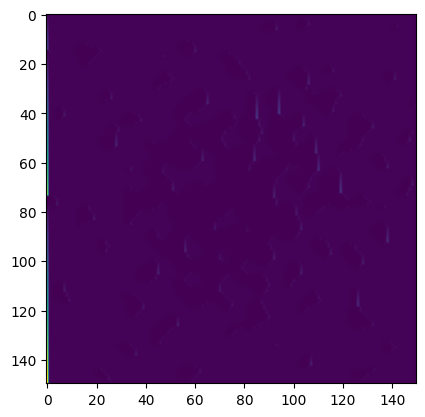

In [12]:
import numpy as np

def count_zero_neighbors_compressed(indices, values, shape):
    # Initialize the count grid
    zero_count_grid = np.zeros(shape, dtype=int)

    # Process each change in the compressed data
    for i in range(len(indices)):
        row, start_col = indices[i]
        end_col = indices[i+1][1] if i+1 < len(indices) and indices[i+1][0] == row else shape[1]
        value = values[i]

        # If the current segment value is zero, consider its neighbors
        if value == 0:
            for col in range(start_col, end_col):
                # Check and update neighbors
                if row > 0:  # Above
                    zero_count_grid[row-1, col] += 1
                if row < shape[0]-1:  # Below
                    zero_count_grid[row+1, col] += 1
                if col > start_col:  # Left
                    zero_count_grid[row, col-1] += 1
                if col < end_col-1:  # Right
                    zero_count_grid[row, col+1] += 1

    # Correct counts on the edges of zero segments
    for idx, val in zip(indices, values):
        row, col = idx
        if val == 0:
            # Set count for the cell itself if surrounded by zeros
            zero_count_grid[row, col] = (zero_count_grid[row, col-1] if col > 0 else 0) + \
                                        (zero_count_grid[row, col+1] if col < shape[1]-1 else 0) + \
                                        (zero_count_grid[row-1, col] if row > 0 else 0) + \
                                        (zero_count_grid[row+1, col] if row < shape[0]-1 else 0)

    return zero_count_grid

# Example usage
# compressed_indices = np.array([(0,0), (0,2), (1,0), (1,3), (2,0), (2,4), (3,1), (4,2)])
# compressed_values = np.array([1, 0, 1, 0, 1, 0, 1, 1])
# shape = (5, 5)

plt.imshow(island_grid)
plt.show()
zero_count_grid = count_zero_neighbors_compressed(compressed_indices, compressed_values, island_grid.shape)
print(zero_count_grid)
plt.imshow(zero_count_grid)


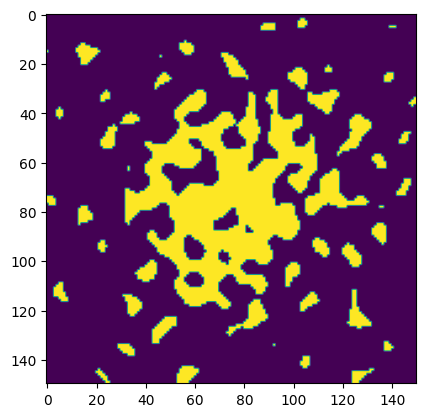

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


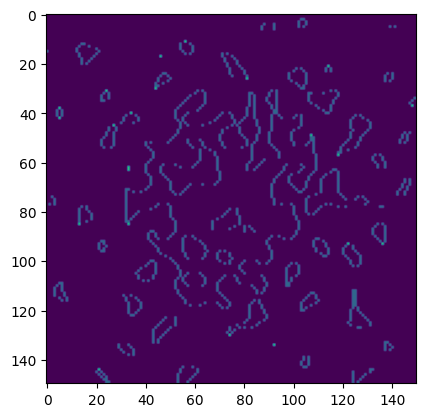

In [13]:
import numpy as np

def count_horizontal_zero_neighbors_compressed(indices, values, shape):
    # Initialize the zero count grid
    zero_count_grid = np.zeros(shape, dtype=int)

    # Process each change in the compressed data, focusing on horizontal adjacency
    current_row = 0
    for i in range(len(indices)):
        row, start_col = indices[i]
        # Determine the end column of this segment
        if i + 1 < len(indices) and indices[i + 1][0] == row:
            end_col = indices[i + 1][1]
        else:
            end_col = shape[1]

        # If the segment's value is zero, update the zero count for adjacent segments
        if values[i] == 0:
            # Update left neighbor if within bounds and not the first column
            if start_col > 0:
                zero_count_grid[row, start_col - 1] += 1

            # Update right neighbor if within bounds and not the last column
            if end_col < shape[1]:
                zero_count_grid[row, end_col] += 1

        # Reset the row start column for new rows
        if i + 1 < len(indices) and indices[i + 1][0] != row:
            current_row = indices[i + 1][0]

    return zero_count_grid

# Example usage
# compressed_indices = np.array([(0,0), (0,2), (1,0), (1,3), (2,0), (2,4), (3,1), (4,2)])
# compressed_values = np.array([1, 0, 1, 0, 1, 0, 1, 1])
# shape = (5, 5)

plt.imshow(island_grid)
plt.show()
zero_count_grid = count_horizontal_zero_neighbors_compressed(compressed_indices, compressed_values, island_grid.shape)
print(zero_count_grid)
plt.imshow(zero_count_grid, vmin=0, vmax=3)


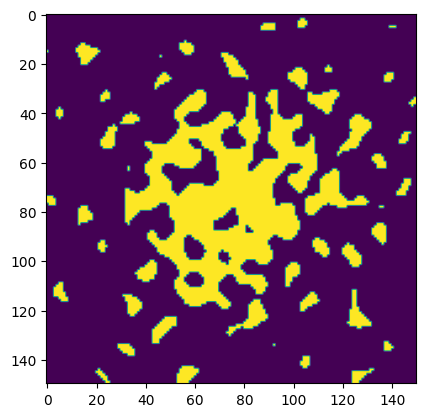

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


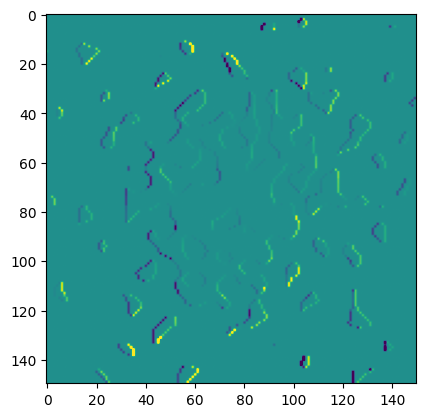

In [14]:
import numpy as np

def count_horizontal_zero_neighbors_compressed(indices, values, shape):
    # Initialize the zero count grid
    zero_count_grid = np.zeros(shape, dtype=int)

    # Initialize variables to track the range of zeros
    last_index = 0
    last_row = 0

    # Process each segment based on the compressed indices
    for i in range(len(indices)):
        row, start_col = indices[i]

        # Determine the end column of this segment
        if i + 1 < len(indices) and indices[i + 1][0] == row:
            end_col = indices[i + 1][1]
        else:
            end_col = shape[1]

        # Handle zero segments
        if values[i] == 0:
            # Adjust the count for the left neighbor of the zero segment
            if start_col > 0:
                zero_count_grid[row, start_col - 1] += end_col - start_col  # Left boundary of zero segment

            # Adjust the count for the right neighbor of the zero segment
            if end_col < shape[1]:
                zero_count_grid[row, end_col] -= end_col - start_col  # Right boundary of zero segment

        # Adjust for the new row
        if row != last_row:
            last_index = 0
            last_row = row

    return zero_count_grid

# Example usage
# compressed_indices = np.array([(0,0), (0,2), (1,0), (1,3), (2,0), (2,4), (3,1), (4,2)])
# compressed_values = np.array([1, 0, 1, 0, 1, 0, 1, 1])
# shape = (5, 5)

plt.imshow(island_grid)
plt.show()
zero_count_grid = count_horizontal_zero_neighbors_compressed(compressed_indices, compressed_values, island_grid.shape)
print(zero_count_grid)
plt.imshow(zero_count_grid, vmin=-50, vmax=50)


In [15]:
import numpy as np
from scipy.ndimage import rotate

# Create an example 2D array
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Rotate the array by 45 degrees
rotated_array = rotate(array, 45, reshape=True, mode='constant', cval=0)

print(rotated_array)

[[0 0 0 0]
 [0 2 6 0]
 [0 4 8 0]
 [0 0 0 0]]


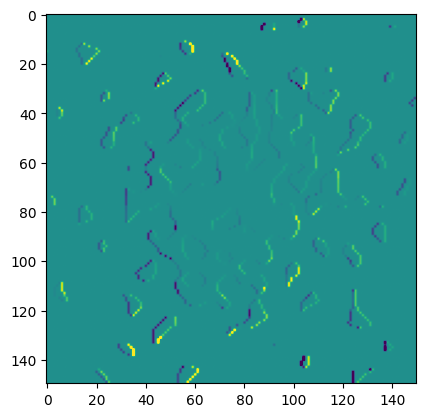

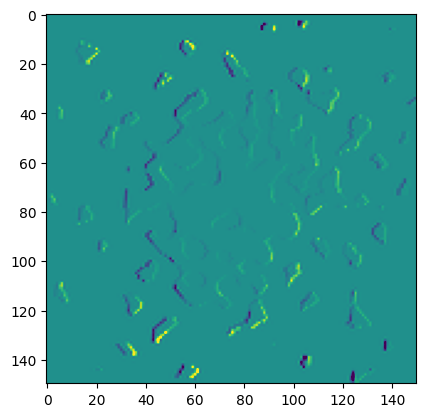

In [49]:
# Compress to get indices and values of changes
def calculate_fetchGrid(grid, angle=0):
  island_grid=grid
  # plt.imshow(island_grid);plt.show()
  if angle !=0:
    island_grid = rotate(island_grid, angle, reshape=False, mode='constant', cval=0)
    # plt.imshow(island_grid);plt.show()
    # input()

  compressed_indices, compressed_values = delta_compress_indices(island_grid)

  # Decompress to reconstruct the original grid
  decompressed_data = delta_decompress_indices(compressed_indices, compressed_values, island_grid.shape)


  zero_count_grid = count_horizontal_zero_neighbors_compressed(compressed_indices, compressed_values, island_grid.shape)

  if angle != 0:
    zero_count_grid = rotate(zero_count_grid, -angle, reshape=False, mode='constant', cval=0)

  return zero_count_grid


fetch = calculate_fetchGrid(island_grid, angle=0)
plt.imshow(fetch, vmin = -50, vmax = 50);plt.show()

fetch = calculate_fetchGrid(island_grid, angle=5)
plt.imshow(fetch, vmin = -50, vmax = 50);plt.show()

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]


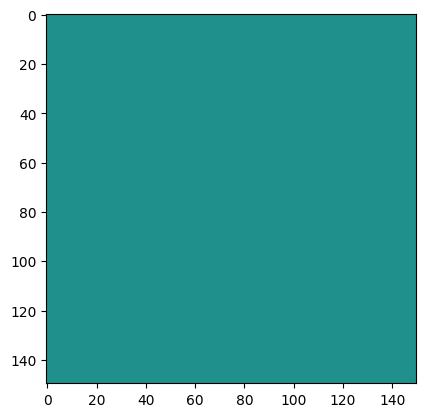

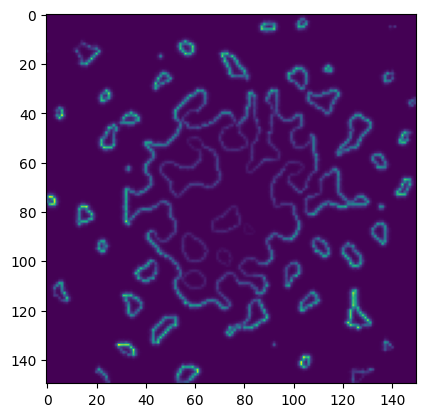

In [78]:
#average (ish) of all angles

angles = list(range(0,180,5))
print(angles)
fetchGrid = island_grid.copy()*0
plt.imshow(fetchGrid, vmin = -50, vmax = 50);plt.show()
for a in angles:
  fetchAngle = calculate_fetchGrid(island_grid, angle=a)
  fetchGrid += np.abs(fetchAngle)
plt.imshow(fetchGrid, vmin = 0, vmax = fetchGrid.max());plt.show()

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165]


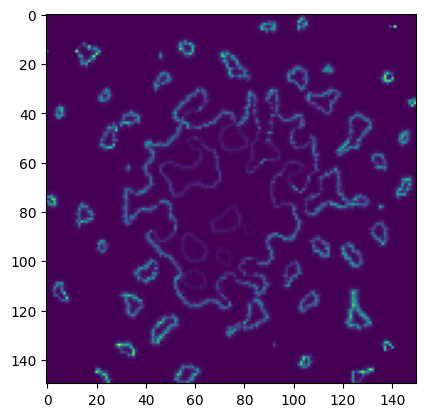

In [77]:
#max (ish) of all angles

angles = list(range(0,180,15))
print(angles)
fetchGrid = island_grid.copy()*0
# plt.imshow(fetchGrid, vmin = -50, vmax = 50);plt.show()
for a in angles:
  fetchAngle = np.abs(calculate_fetchGrid(island_grid, angle=a))
  # fetchGrid += fetchAngle
  fetchGrid = np.maximum(fetchGrid, fetchAngle)
plt.imshow(fetchGrid, vmin = 0, vmax = fetchGrid.max());plt.show()

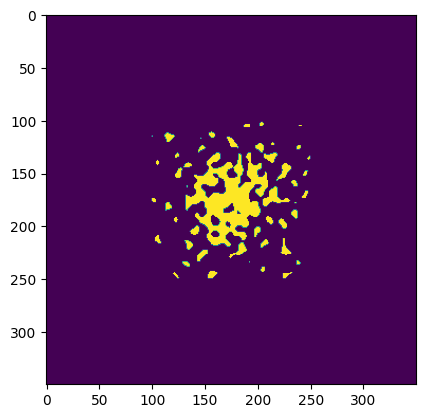

In [94]:
def pad_image(input_image, pad_amount):

    if pad_amount !=0:

      # Determine the new size of the larger image
      padded_height = input_image.shape[0] + 2 * pad_amount
      padded_width = input_image.shape[1] + 2 * pad_amount

      # Create the larger array filled with zeros or another placeholder value
      padded_image = np.zeros((padded_height, padded_width))

      # Define where to place the input image inside the padded image
      start_row = pad_amount
      start_col = pad_amount

      # Place the input image in the defined position within the padded image
      padded_image[start_row:start_row + input_image.shape[0], start_col:start_col + input_image.shape[1]] = input_image

      return padded_image

    else:
      return input_image

def unpad_image(padded_image, pad_amount):

    if pad_amount !=0:
      # Calculate the start and end indices to slice the original image from the padded image
      start_index = pad_amount
      end_index_row = padded_image.shape[0] - pad_amount
      end_index_col = padded_image.shape[1] - pad_amount

      # Slice out the original image from the padded image
      original_image = padded_image[start_index:end_index_row, start_index:end_index_col]

      return original_image

    else:
      return padded_image

island_padded = pad_image(island_grid, 100)
plt.imshow(island_padded, vmin = 0, vmax = island_padded.max());plt.show()

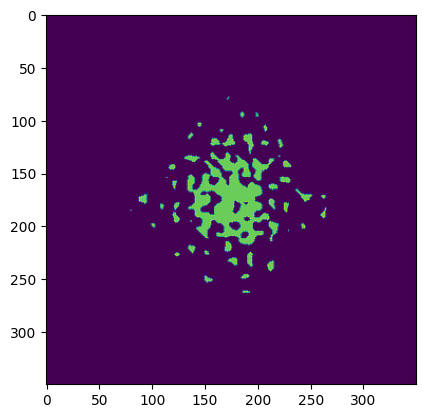

In [75]:
rotated_padded_array = rotate(island_padded, 45, reshape=False, mode='constant', cval=0)
plt.imshow(rotated_padded_array, vmin = 0, vmax = rotated_padded_array.max());plt.show()

[0, 90]


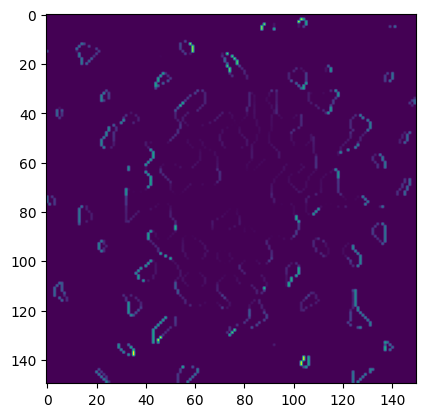

In [83]:
#average (ish) of all angles with padding

angles = list(range(0,180,90))
print(angles)
pad = 50
island_padded = pad_image(island_grid, pad)
fetchGrid = island_padded.copy()*0
for a in angles:
  fetchAngle = calculate_fetchGrid(island_padded, angle=a)
  fetchGrid += np.abs(fetchAngle)
fetchGrid = unpad_image(fetchGrid,pad)
plt.imshow(fetchGrid, vmin = 0, vmax = fetchGrid.max());plt.show()

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165]


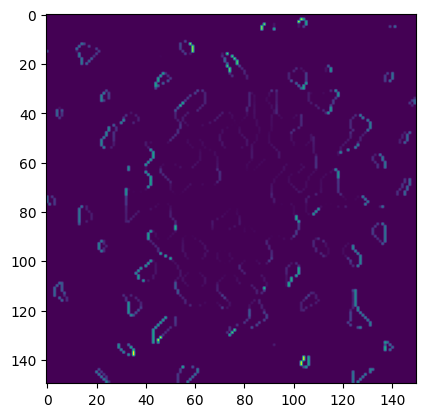

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165]


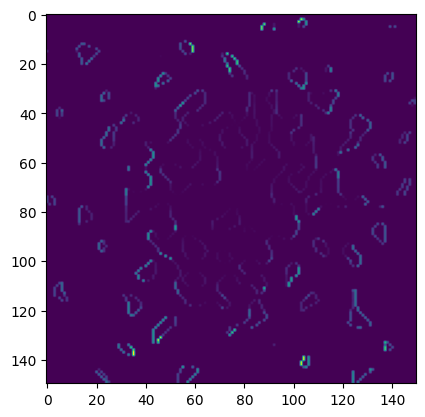

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165]


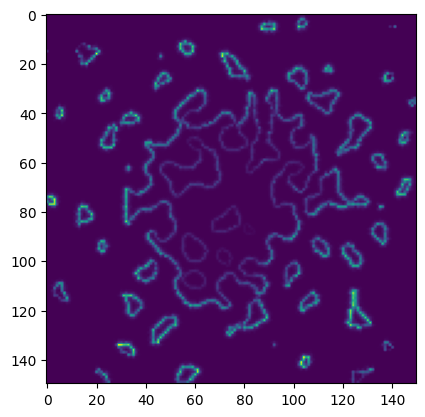

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [115]:
def full_fetch(step=15, mode='mean', pad = 100,proc_grid=island_grid):
  angles = list(range(0,180,step))
  print(angles)
  # pad = 50
  island_padded = pad_image(proc_grid, pad)
  fetchGrid = island_padded.copy()*0
  for a in angles:
    fetchAngle = np.abs(calculate_fetchGrid(island_padded, angle=a))
    if mode == 'mean':
      fetchGrid += fetchAngle
    elif mode == 'max':
      fetchGrid = np.maximum(fetchGrid, fetchAngle)
  fetchGrid = unpad_image(fetchGrid,pad)
  plt.imshow(fetchGrid, vmin = 0, vmax = fetchGrid.max());plt.show()
  return fetchGrid

full_fetch(step=15, mode='mean', pad = 50)
full_fetch(step=15, mode='mean', pad = 25)
full_fetch(step=15, mode='mean', pad = 0)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]


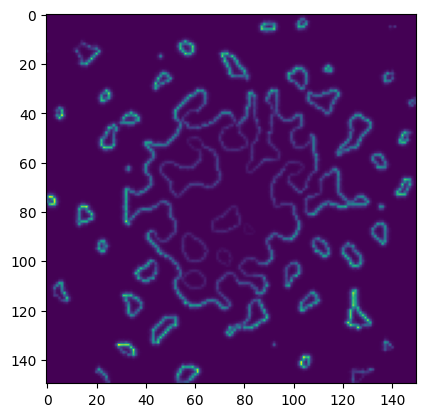

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165]


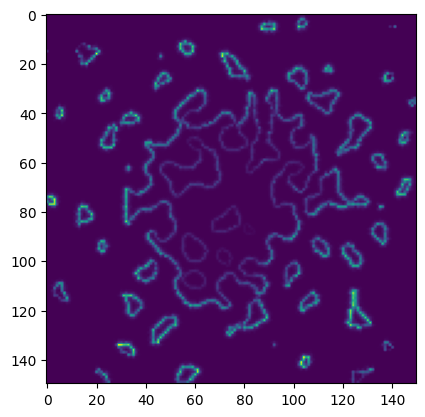

[0, 45, 90, 135]


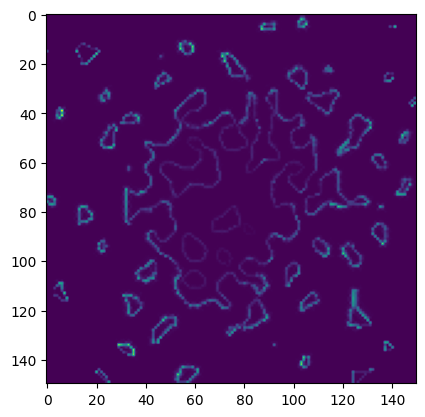

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [116]:
full_fetch(step=5, mode='mean', pad = 0)
full_fetch(step=15, mode='mean', pad = 0)
full_fetch(step=45, mode='mean', pad = 0)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]


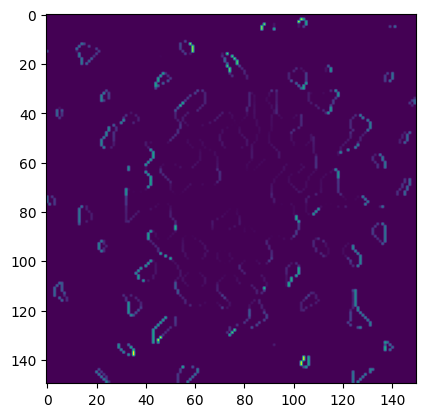

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]


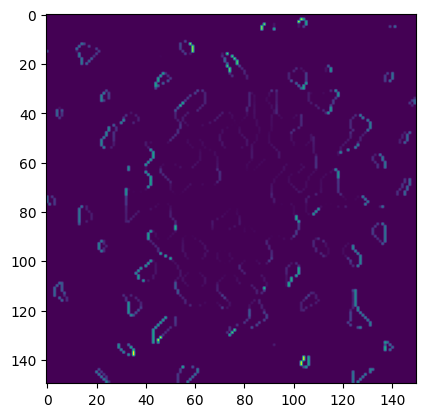

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
full_fetch(step=5, mode='mean', pad = 50)
full_fetch(step=5, mode='max', pad = 50)

Array shape: (256, 256)
Array data type: uint8


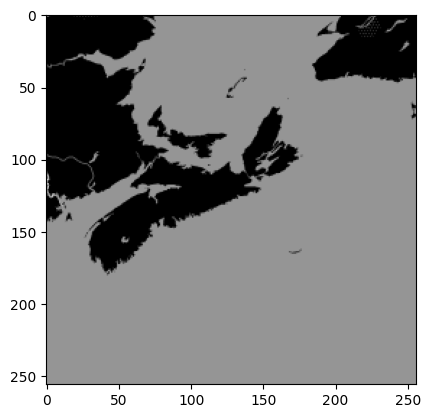

In [109]:
# pro tips!
# https://edward17.github.io/LayersCollection/#map=19/46.80112/9.83219&layers=1000
# https://tools.geofabrik.de/map/?type=Geofabrik_Standard&grid=1#6/44.7022/-61.6120


import requests
from PIL import Image
import numpy as np
from io import BytesIO

# Define the tile coordinates and zoom level
zoom = 5
tile_x = 10
tile_y = 11

# Construct the URL to fetch the tile from OpenStreetMap's standard tile server
# url = f"https://tile.openstreetmap.org/{zoom}/{tile_x}/{tile_y}.png"

url = f"https://a.basemaps.cartocdn.com/dark_nolabels/{zoom}/{tile_x}/{tile_y}.png"

# Set headers with a User-Agent
headers = {
    'User-Agent': 'MyApplication (myemail@example.com)'
}

# Fetch the tile
response = requests.get(url, headers=headers)
if response.status_code == 200:
    # Open the image from the response
    image = Image.open(BytesIO(response.content))

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Display the array shape and type
    print("Array shape:", image_array.shape)
    print("Array data type:", image_array.dtype)

    # Optionally, show the image using PIL
    # image.show()
    plt.imshow(image_array,cmap='gray')
else:
    print("Failed to retrieve the tile. Status code:", response.status_code)


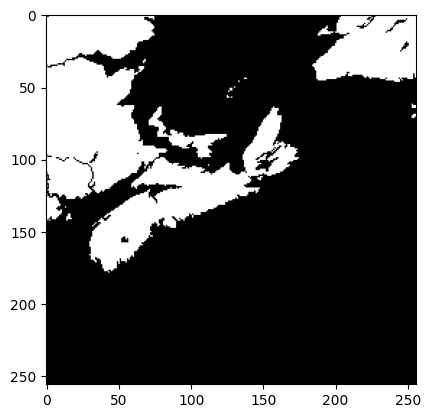

In [124]:
nsMask = np.where(image_array>2,0,1)
plt.imshow(nsMask,cmap='gray')

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]


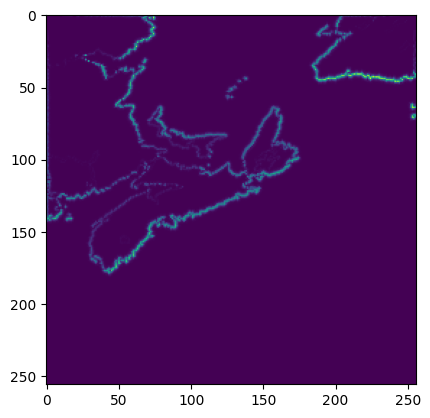

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [2, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [129]:
full_fetch(step=5, mode='max', pad = 0,proc_grid=nsMask)